In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __init__ import *
# from runner.svg2plan import run_new_layout
from new_solutions.selection import *
from domains.domain import Domain

from read.svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator
from adjacencies.connectivity import ConnectivityGenerator
from placement.executer import PlacementExecuter
from visuals.plotter import Plotter, plot_general
from export.saver import save_pickle
from placement2.place import create_placement_and_update_layout

In [36]:
case  = "amber_b_f01.svg"
sv = SVGReader(case)
sv.run()

No reference for svg to meters conversion!! 


In [37]:
plot_general(sv.layout.domains)

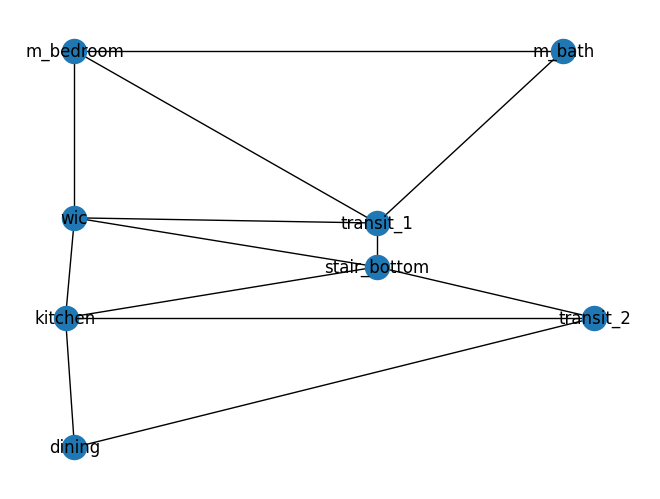

In [40]:
ag = AdjacencyGenerator(sv.layout, buffer_size=0.16)
ag.run()
ag.draw_graph()

In [39]:
playout = create_placement_and_update_layout(ag.layout)

Exception: Exceeded max iter

In [7]:
plot_general(playout.domains)

In [9]:
re = Reporter(playout)
re.run()
re.problems

[Problem(ix=1, SIDE_HOLE, ['living', 'den_closet'], resolved=False,  n_actions=2,
 Problem(ix=2, HOLE, ['kitchen', 'bath', 'corridor', 'm_bath', 'dining'], resolved=False,  n_actions=4,
 Problem(ix=3, OVERLAP, ['living', 'dining'], resolved=False,  n_actions=2,
 Problem(ix=4, OVERLAP, ['dining', 'corridor'], resolved=False,  n_actions=2,
 Problem(ix=5, HOLE, ['transit', 'linen', 'laundry', 'bed1_closet'], resolved=False,  n_actions=4,
 Problem(ix=6, OVERLAP, ['transit', 'm_bath'], resolved=False,  n_actions=4,
 Problem(ix=7, HOLE, ['corridor', 'den', 'linen', 'laundry'], resolved=False,  n_actions=4]

In [10]:
c = Cook(re)



initializing.. 0
running again -> 1
problem being studied: -> Problem(ix=1, SIDE_HOLE, ['living', 'den_closet'], resolved=False,  n_actions=2
next best layout den_closet-STRETCH-for-SIDE_HOLE near ['living', 'den_closet']6-PS:8.00-S:7.00


In [18]:
c.run_again()

running again -> 9
problem being studied: -> Problem(ix=2, OVERLAP, ['bath', 'corridor'], resolved=False,  n_actions=2
next best layout bath-PUSH-for-OVERLAP near ['bath', 'corridor']0-PS:0.10-S:0.05


In [ ]:
c.plot_all()

In [19]:
plot_general(c.bl_hist[-1].layout.domains)